In [2]:
from src.scraping.get_data import *
from src.utils.checks import *
from src.portfolio.data_manipulation import *
from src.plots.basics import *
from src.computations.compute_returns import *
from src.computations.metrics import *
from src.utils.basics import *
from src.plots.basics_streamlit import *

get_data_info()
data = get_data_updated_2025()

['/home/cavallo/Finance4All/data/indexes/MSCI_Europe_Small_Cap_Value_Weighted.csv', '/home/cavallo/Finance4All/data/indexes/Historical_data_updated.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_Europe.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_World_Momentum.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_ACWI.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_World.csv', '/home/cavallo/Finance4All/data/indexes/S&P_500_Minimum_Volatility.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_Emerging_Markets.csv', '/home/cavallo/Finance4All/data/indexes/FTSE_World_Government_Bond_Developed_Markets.csv', '/home/cavallo/Finance4All/data/indexes/S&P_500.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_USA_Small_Cap_Value_Weighted.csv']


download_data_updated()

In [6]:
get_list_of_portfolios()

['100_2factors',
 '80_20_ACWI',
 '80_20_World',
 '80_20_2factors',
 'lifestrategy60',
 'lifestrategy80',
 'lifestrategy20',
 'lifestrategy0',
 'lifestrategy40',
 'lifestrategy100',
 '80_20_1factor',
 '60_40_World']

In [3]:
PORTFOLIOS = [
    '100_2factors',
    '80_20_2factors',
    '80_20_1factor',
    '80_20_ACWI',
    '80_20_World'
]

PORTOFOLIO_NAMES = {
    '100_2factors'  : '100% Stocks + SmallCap Value + Momentum',
    '80_20_2factors': '80% Stocks + 20% Bonds + SmallCap Value + Momentum',
    '80_20_1factor' : '80% Stocks + 20% Bonds + SmallCap Value',
    '80_20_ACWI'    : '80% Stocks(ACWI) + 20% Bonds',
    '80_20_World'   : '80% Stocks(World) + 20% Bonds',
}

PORTFOLIO_DESCRIPTIONS = {
    '100_2factors'  : 'This portfolio invests 100% in stocks, focusing on small-cap value and momentum strategies.',
    '80_20_2factors': 'This portfolio allocates 80% to stocks and 20% to bonds, incorporating small-cap value and momentum factors.',
    '80_20_1factor' : 'This portfolio invests 80% in stocks and 20% in bonds, focusing on small-cap value.',
    '80_20_ACWI'    : 'This portfolio invests 80% in global stocks (ACWI) and 20% in bonds.',
    '80_20_World'   : 'This portfolio invests 80% in world stocks and 20% in bonds.'
}

# Add another group of portfolios in col2
SIMPLE_PORTFOLIOS = [
    'lifestrategy100',
    'lifestrategy80',
    'lifestrategy60',
    'lifestrategy40',
    'lifestrategy20',
    'lifestrategy0'
]

SIMPLE_PORTFOLIO_NAMES = {
    'lifestrategy100': '100% Stocks',
    'lifestrategy80' : '80% Stocks + 20% Bonds',
    'lifestrategy60' : '60% Stocks + 40% Bonds',
    'lifestrategy40' : '40% Stocks + 60% Bonds',
    'lifestrategy20' : '20% Stocks + 80% Bonds',
    'lifestrategy0'  : '100% Bonds'
}

SIMPLE_PORTFOLIO_DESCRIPTIONS = {
    'lifestrategy100': 'This portfolio invests 100% in stocks, suitable for aggressive strategies seeking high growth. Note that stocks are MSCI World',
    'lifestrategy80' : 'This portfolio allocates 80% to stocks and 20% to bonds, balancing growth and stability. Stocks are MSCI World',
    'lifestrategy60' : 'This portfolio invests 60% in stocks and 40% in bonds, providing moderate growth with some stability. Stocks are MSCI World',
    'lifestrategy40' : 'This portfolio invests 40% in stocks and 60% in bonds, focusing on stability with some growth potential. Stocks are MSCI World',
    'lifestrategy20' : 'This portfolio invests 20% in stocks and 80% in bonds, prioritizing stability with minimal growth. Stocks are MSCI World',
    'lifestrategy0'  : 'This portfolio invests 100% in bonds, suitable for conservative strategies seeking capital preservation.'
}

ALL_PORTFOLIOS = PORTFOLIOS + SIMPLE_PORTFOLIOS
ALL_PORTFOLIOS

['100_2factors',
 '80_20_2factors',
 '80_20_1factor',
 '80_20_ACWI',
 '80_20_World',
 'lifestrategy100',
 'lifestrategy80',
 'lifestrategy60',
 'lifestrategy40',
 'lifestrategy20',
 'lifestrategy0']

In [ ]:
import seaborn as sns
from matplotlib.lines import Line2D

import plotly.express as px

def plot_annualized_returns(results, years=None, plot_figure=True):
    """
    Plots the annualized returns of indices over time interactively using Plotly and Seaborn style.
    """
    df = pd.DataFrame(results)
    df["Date"] = pd.to_datetime(df["Date"], format="%m/%Y")
    df.set_index("Date", inplace=True)

    # Seaborn style for consistency
    sns.set(style="whitegrid", context="talk")

    # Melt for Plotly
    df_reset = df.reset_index()
    df_melt = df_reset.melt(id_vars="Date", var_name="Portfolio", value_name="Annualized Return")

    fig = px.line(
        df_melt,
        x="Date",
        y="Annualized Return",
        color="Portfolio",
        title=f"Annualized Returns of {years} years rolling windows",
        labels={"Annualized Return": "Annualized Return (%)"},
        template="simple_white"
    )
    fig.update_traces(mode="lines", line=dict(width=2))
    fig.update_layout(
        yaxis_tickformat=".2%",
        xaxis_title="Date",
        yaxis_title="Annualized Return (%)",
        legend_title="Portfolio",
        title_font_size=18,
        title_font_family="Arial",
        legend=dict(font=dict(size=14)),
        xaxis=dict(tickformat="%Y")
    )
    return fig


In [ ]:
def plot_return_distributions(df):
    """
    Interactive horizontal violin plot of portfolio returns with matplotlib colors,
    clean white style, and custom median and 5th percentile lines.
    Lines are visible by mapping portfolio categories to numeric y-positions.
    """
    import plotly.express as px
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Prepare data
    returns_df = df.drop(columns='Date').dropna(how='all')
    long_df = returns_df.melt(var_name='Portfolio', value_name='Return').dropna()

    # Get unique portfolios
    portfolios = long_df['Portfolio'].unique()

    # Get matplotlib colormap and convert to hex colors
    cmap = plt.get_cmap('tab10')
    colors = {p: '#%02x%02x%02x' % tuple(int(255*x) for x in cmap(i)[:3]) 
              for i, p in enumerate(portfolios)}
    
    # Dynamic height
    plot_height = 160 * len(portfolios)

    # Set seaborn style for font consistency (optional)
    sns.set(style="whitegrid", context="talk")

    # Create violin plot WITHOUT boxplot lines
    fig = px.violin(
        long_df,
        y='Portfolio',
        x='Return',
        color='Portfolio',
        box=False,
        points='all',
        hover_data=['Return'],
        color_discrete_map=colors,
        template='simple_white'
    )

    # Get category order and corresponding y-positions
    category_order = fig.layout.yaxis.categoryarray
    y_positions = {p: i for i, p in enumerate(category_order)}

    # Update layout
    fig.update_layout(
        xaxis_title='Monthly Return',
        yaxis_title='Portfolio',
        height=plot_height,
        violinmode='group',
        violingap=0.5,
        title_font_size=18,
        title_font_family='Arial',
        legend_title_text='Portfolio',
        legend=dict(font=dict(size=14)),
        xaxis=dict(
            tickformat='.2%',
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1,
            zeroline=False,
        ),
        yaxis=dict(
            tickmode='array',
            tickvals=list(y_positions.values()),
            ticktext=list(y_positions.keys()),
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1,
            zeroline=False,
        ),
    )

    # Calculate stats
    median = long_df.groupby('Portfolio')['Return'].median()
    percentile_5 = long_df.groupby('Portfolio')['Return'].quantile(0.05)

    shapes = []
    annotations = []
    line_height = 0.6

    for portfolio in category_order:
        y_pos = y_positions[portfolio]
        median_val = median[portfolio]
        p5_val = percentile_5[portfolio]

        # Median line
        shapes.append(dict(
            type='line',
            x0=median_val, x1=median_val,
            y0=y_pos - line_height/2, y1=y_pos + line_height/2,
            line=dict(color=colors[portfolio], width=3),
            opacity=1,
            xref='x', yref='y'
        ))
        annotations.append(dict(
            x=median_val,
            y=y_pos + line_height / 2 + 0.15,
            text=f"Median: {median_val:.2%}",
            showarrow=False,
            font=dict(color=colors[portfolio], size=12),
            xanchor='left'
        ))

        # 5th percentile line
        shapes.append(dict(
            type='line',
            x0=p5_val, x1=p5_val,
            y0=y_pos - line_height/2, y1=y_pos + line_height/2,
            line=dict(color=colors[portfolio], width=3, dash='dash'),
            opacity=1,
            xref='x', yref='y'
        ))
        annotations.append(dict(
            x=p5_val,
            y=y_pos - line_height / 2 + 0.70,
            text=f"5th %: {p5_val:.2%}",
            showarrow=False,
            font=dict(color=colors[portfolio], size=12),
            xanchor='left'
        ))

    fig.update_layout(shapes=shapes, annotations=annotations)

    return fig


# Example usage:
fig = plot_return_distributions(final_results)
fig.show()


In [55]:
from src.plots.basics_streamlit import *

plot_annualized_returns_streamlit(final_results)

['/home/cavallo/Finance4All/data/indexes/MSCI_Europe_Small_Cap_Value_Weighted.csv', '/home/cavallo/Finance4All/data/indexes/Historical_data_updated.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_Europe.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_World_Momentum.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_ACWI.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_World.csv', '/home/cavallo/Finance4All/data/indexes/S&P_500_Minimum_Volatility.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_Emerging_Markets.csv', '/home/cavallo/Finance4All/data/indexes/FTSE_World_Government_Bond_Developed_Markets.csv', '/home/cavallo/Finance4All/data/indexes/S&P_500.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_USA_Small_Cap_Value_Weighted.csv']
['/home/cavallo/Finance4All/data/indexes/MSCI_Europe_Small_Cap_Value_Weighted.csv', '/home/cavallo/Finance4All/data/indexes/Historical_data_updated.csv', '/home/cavallo/Finance4All/data/indexes/MSCI_Europe.csv', '/home/cavallo/Finance4All/data

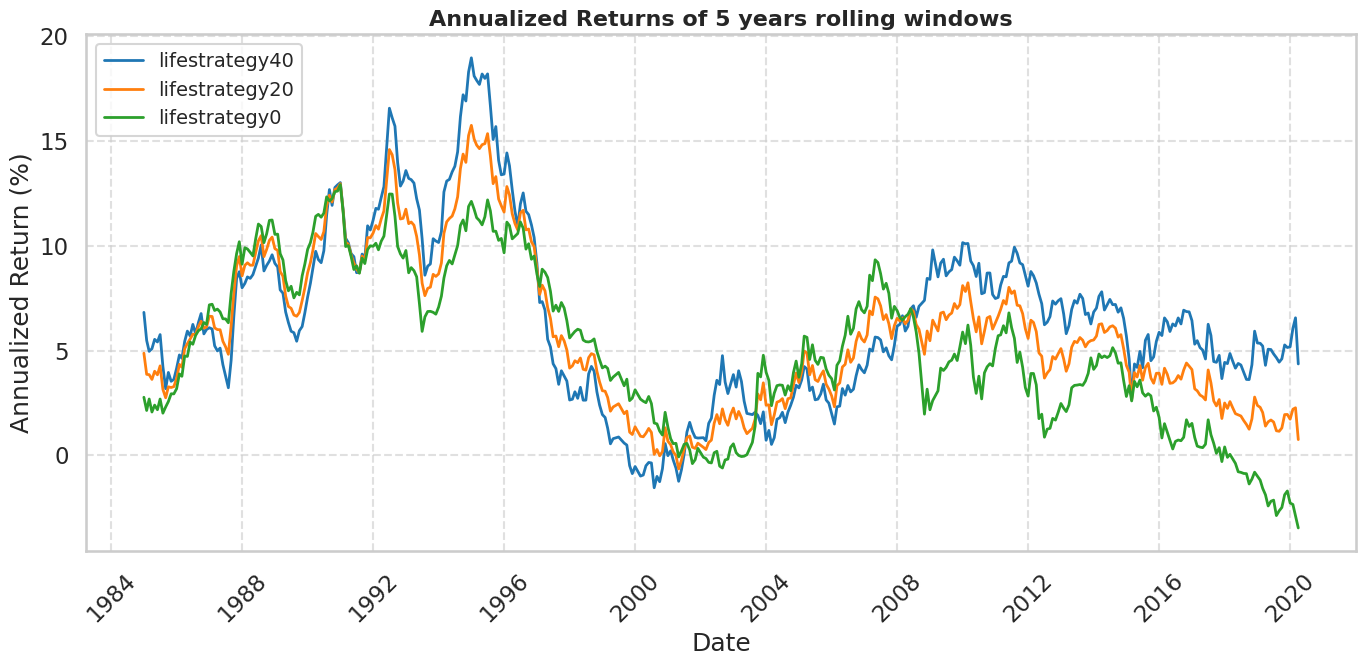

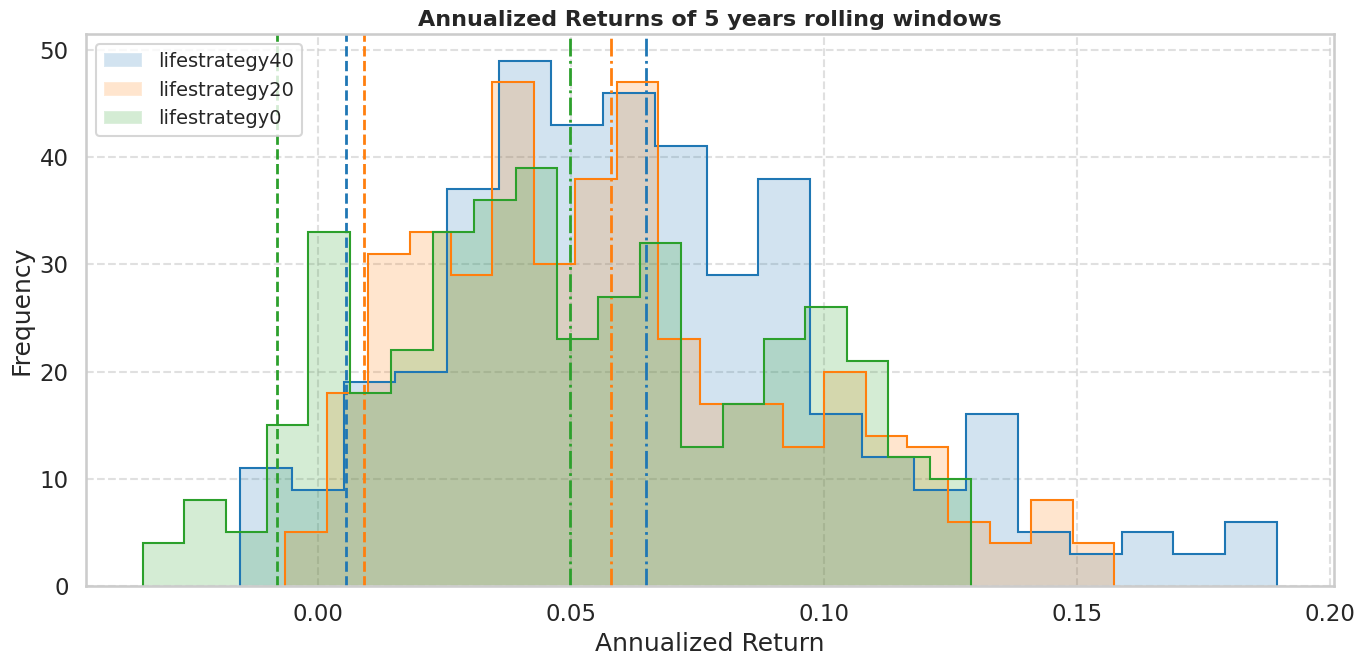

In [4]:
portfolios = ['100_2factors',
              '80_20_2factors',
              '80_20_1factor',
              '80_20_ACWI',
              '80_20_World']

portfolios = [ 'lifestrategy40',
               'lifestrategy20',
               'lifestrategy0']

for years in [5]:
    final_results = None 
    for portfolio_name in portfolios:

        portfolio = load_portfolio(portfolio_name)
        data, weights = prune_data_portfolio(portfolio)

        # Compute the returns
        results = compute_portfolio_returns_combined(*prune_data_portfolio(portfolio), years=years)
        results = results.rename(columns={results.columns[-1]: portfolio_name})
        results[portfolio_name] = results[portfolio_name].round(5)

        final_results = merge_results(final_results, results)
    
    plot_annualized_returns(final_results, years=years)
    plot_returns_histogram(final_results, years=years)

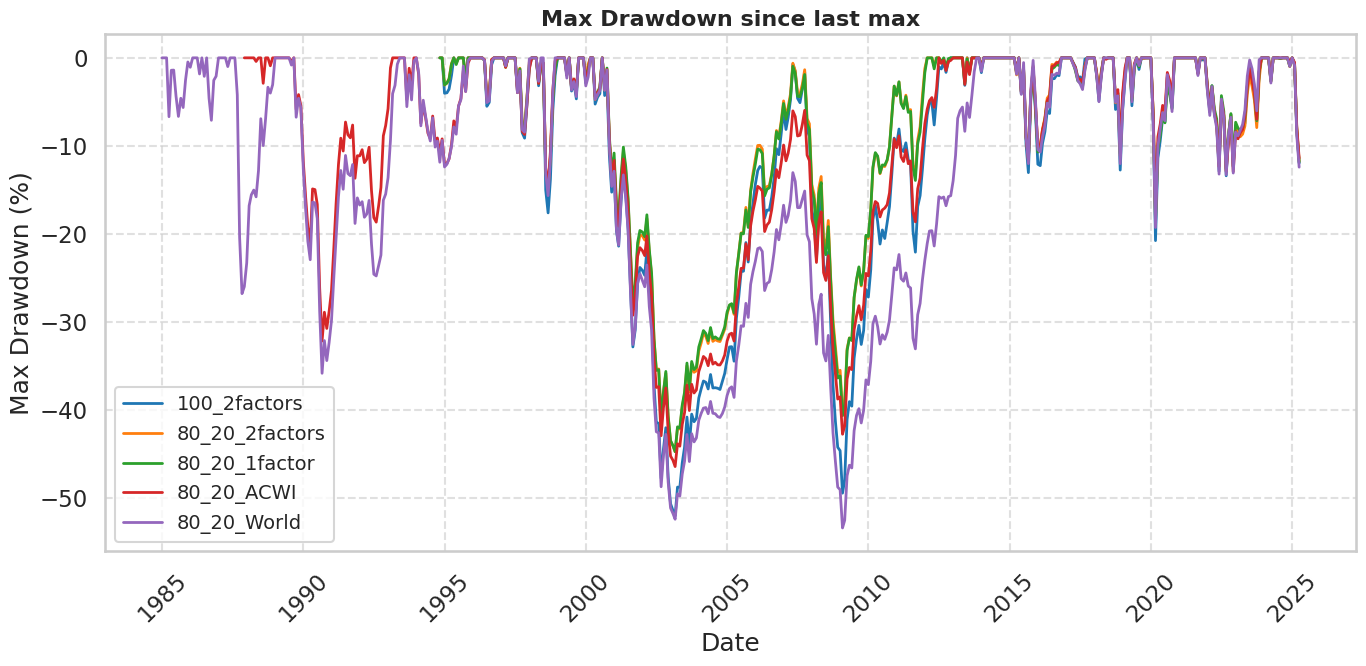

In [63]:
final_maxdrawdown = None

for portfolio_name in portfolios:

    portfolio = load_portfolio(portfolio_name)
    data, weights = prune_data_portfolio(portfolio)

    prices = compute_portfolio_prices(portfolio, portfolio_name)

    maxdrawdown = max_drawdown(prices)

    final_maxdrawdown = merge_results(final_maxdrawdown, maxdrawdown)

plot_max_drawdown(final_maxdrawdown)